Liczba zdarzeń: 16
Czasy zdarzeń: [0, 2.567145963447376, 4.79617682780337, 5.1748443034689116, 5.486837333849091, 5.724782398268386, 5.971367812131489, 6.4119060229314915, 6.518414312209589, 7.22166181579332, 7.315641854826528, 8.156250089752831, 8.991838129308315, 9.22679953794146, 9.249125325627942, 9.345187298311414, 9.657665389083613, 10]


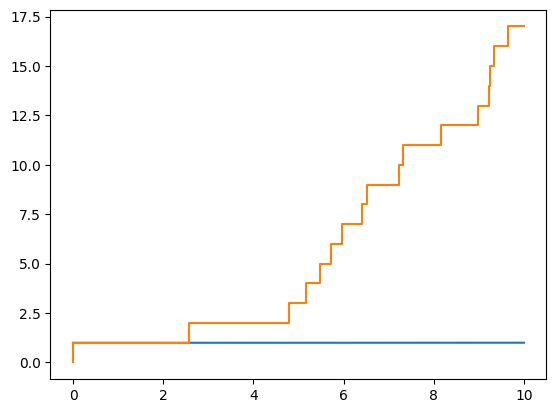

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.integrate import quad


def generuj_poissona(T, lamb, lamb_max):
    t = 0
    I = 0
    S = [0]

    while True:
        u1 = np.random.rand()
        t -= np.log(u1) / lamb(t)
        if t > T:
            break
        u2 = np.random.rand()
        if u2 <= lamb(t) / lamb_max:
            I += 1
            S.append(t)
    S.append(T)
    return I, S


t = np.linspace(0, 10, 1000)


def lamb(t):
    return 0.5 + 0.5 * t


def intlamb(t):
    return 0.5 * t + 0.25 * t**2


lamb_max = max(lamb(t))

I1, S1 = generuj_poissona(T=10, lamb=lamb, lamb_max=lamb_max)


t = np.linspace(0, 10, 1000)


def L(t):
    return 1 / (t + 1)


def integral_L(t):
    return 0.5 * t + t**2


plt.plot(
    t,
    scipy.stats.poisson.cdf(t, integral_L(10**-2)),
    label="Dystrybuanta teoretyczna",
)

print("Liczba zdarzeń:", I1)
print("Czasy zdarzeń:", S1)
plt.step(S1, np.arange(0, len(S1), 1))
plt.show()